In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/206998
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df.columns = ["type","fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","ph","sulphates","alcohol","quality"]
wine_df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   ph                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
ph,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
wine_df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

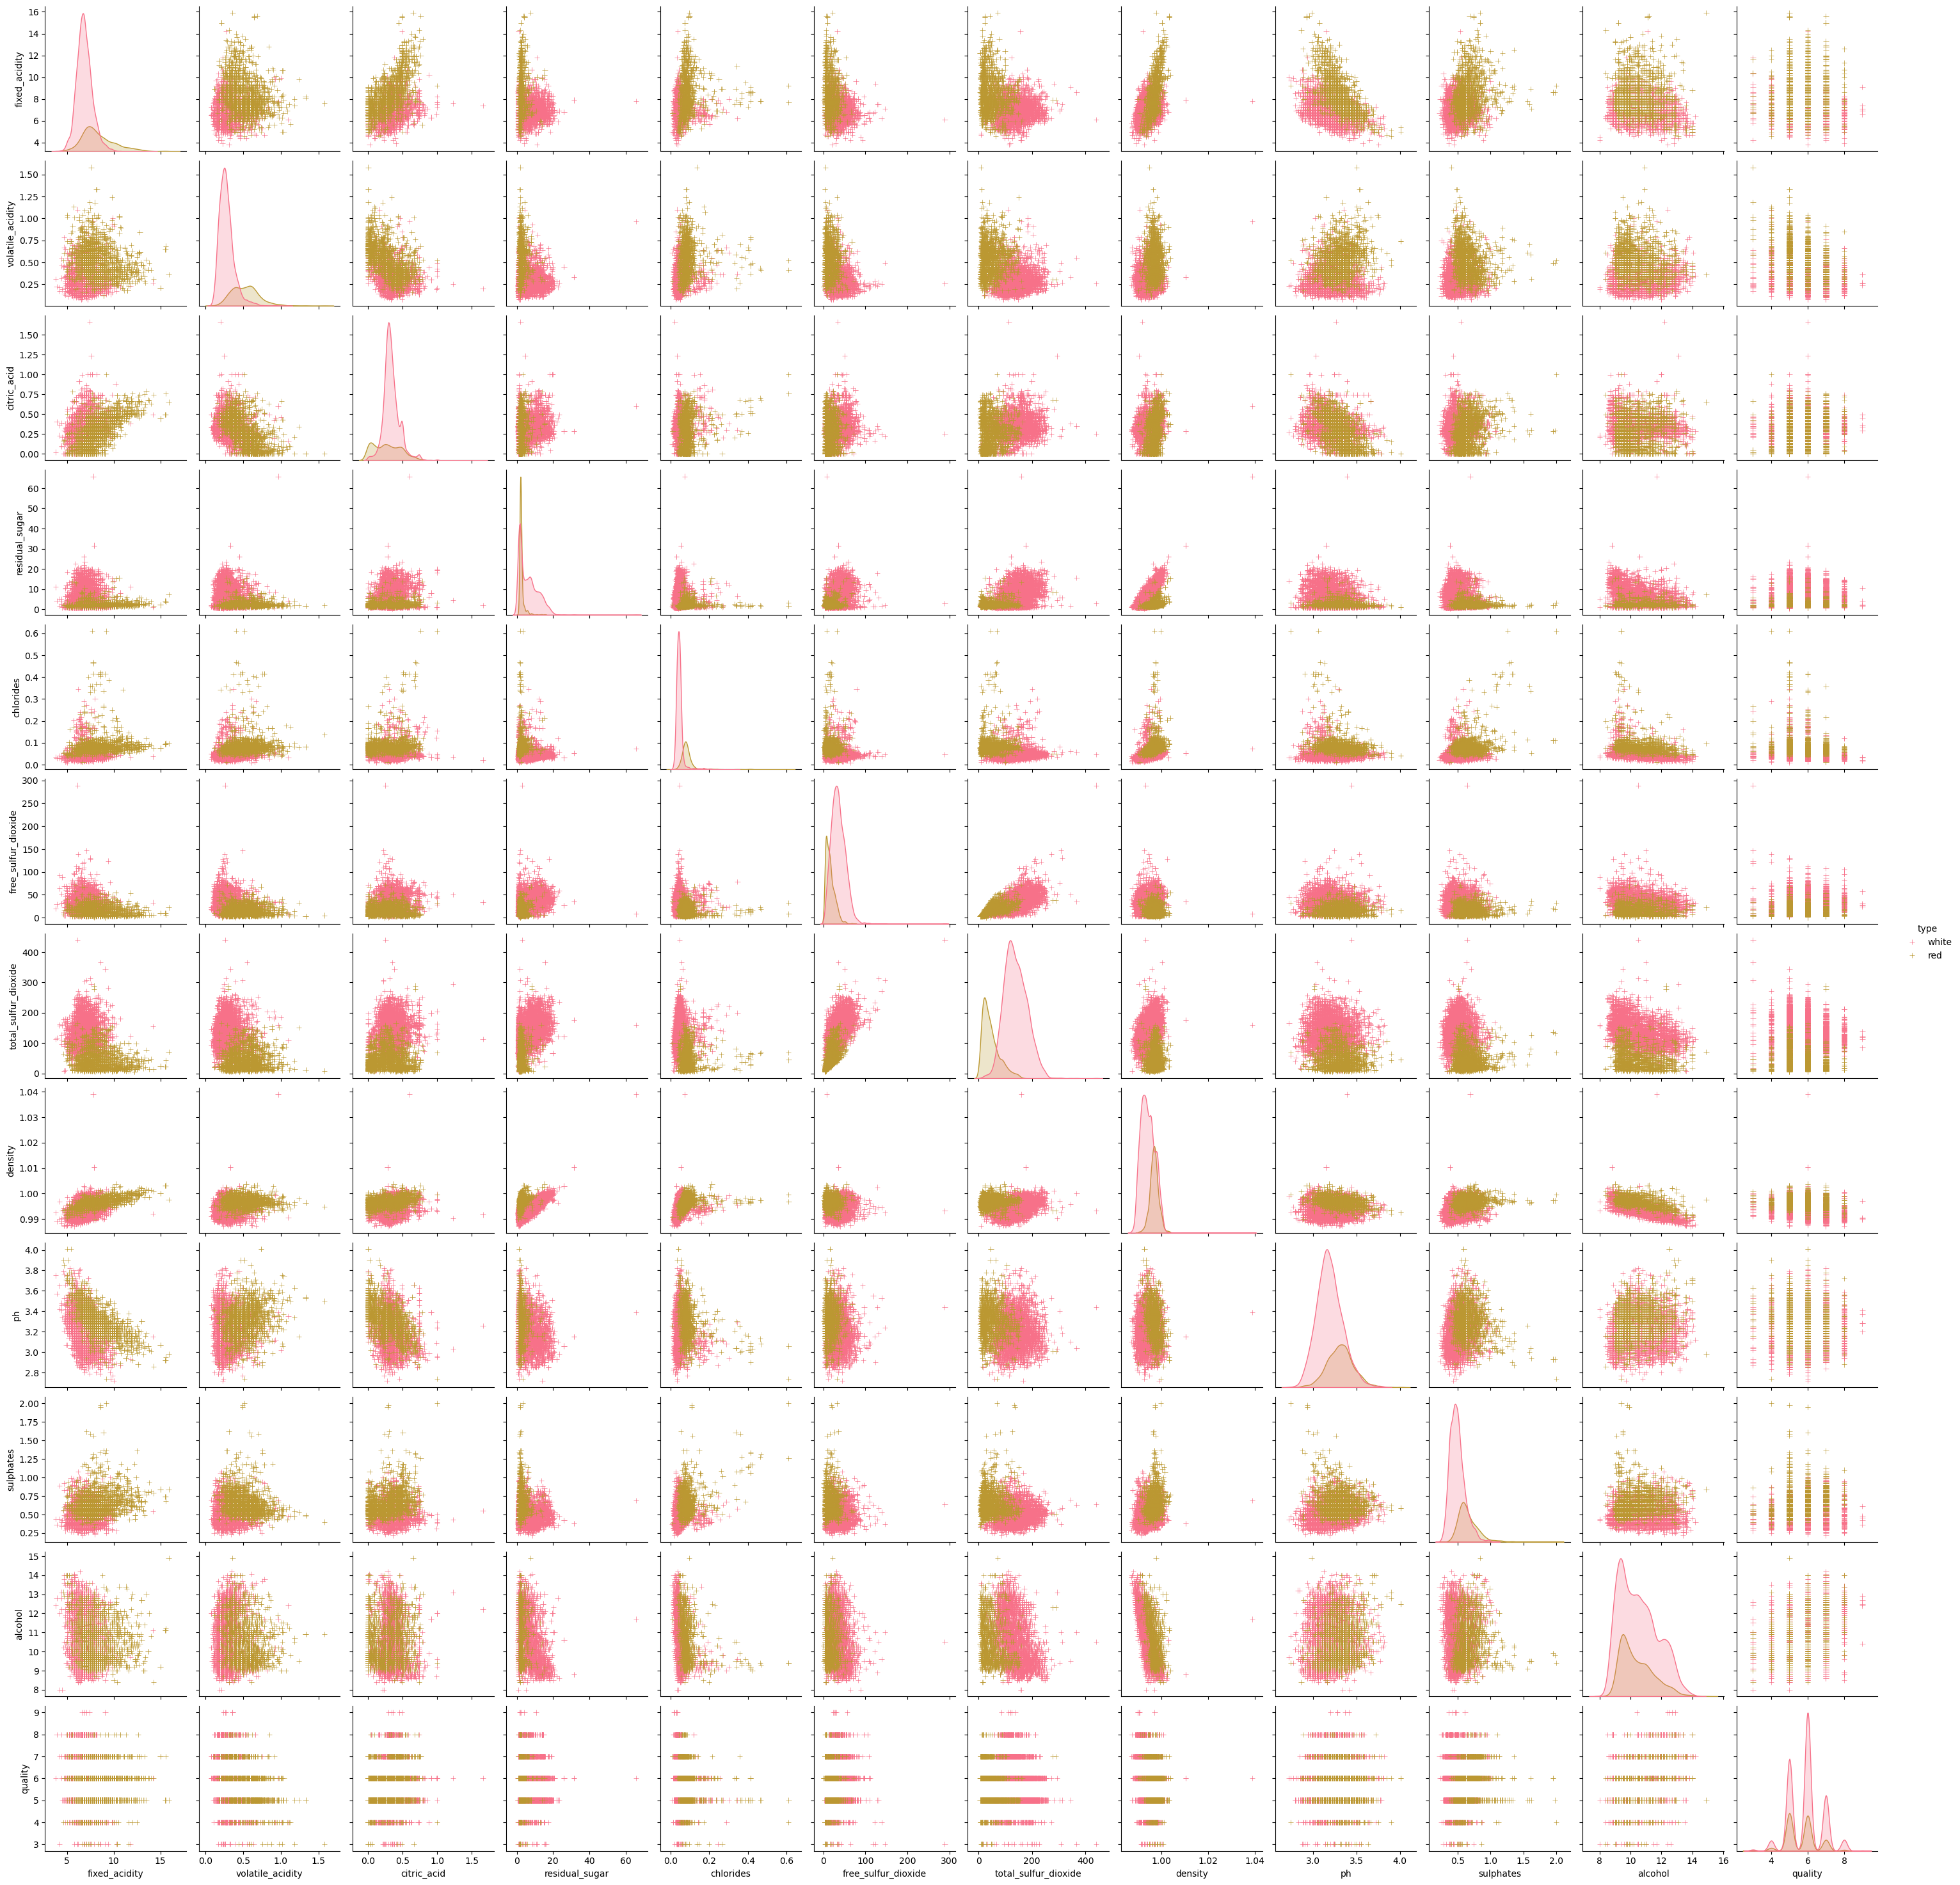

In [8]:
# draw pairplot
g = sns.pairplot(wine_df, hue='type', markers='+')
plt.show()

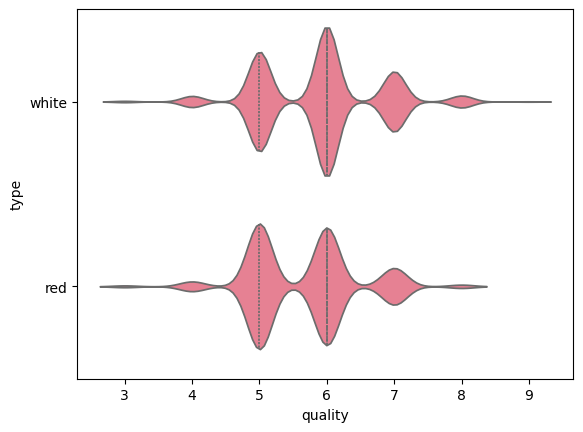

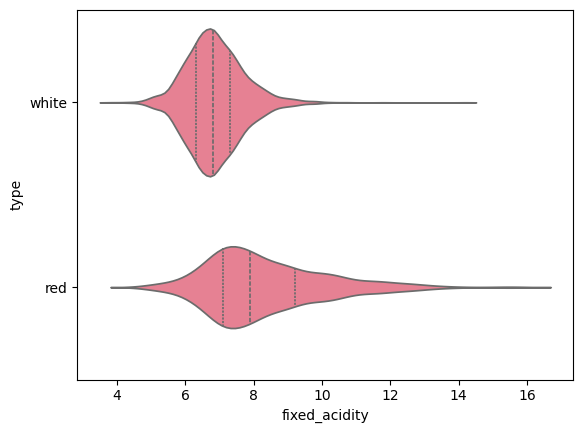

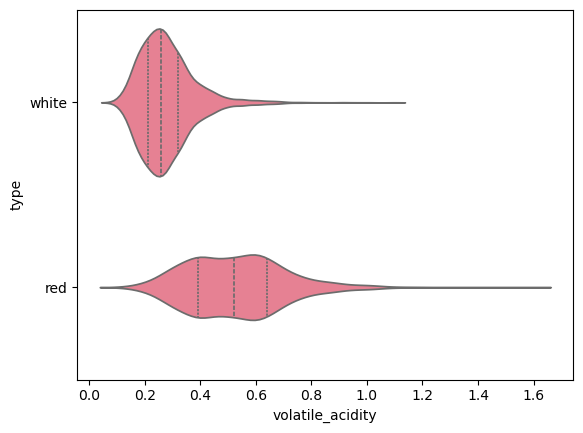

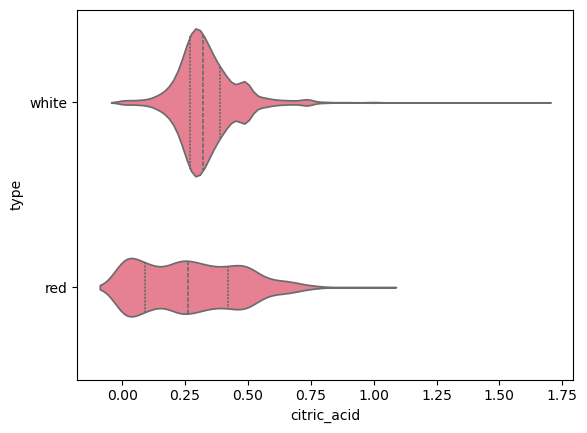

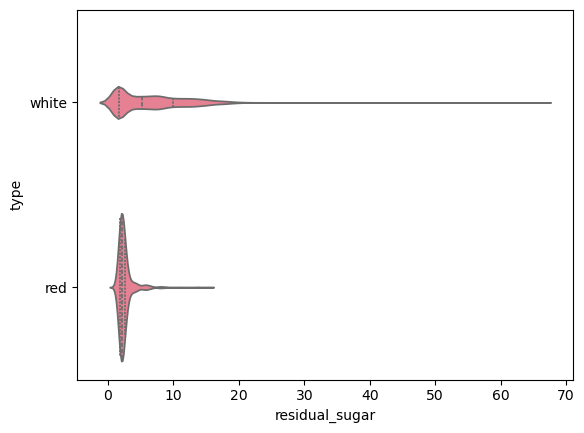

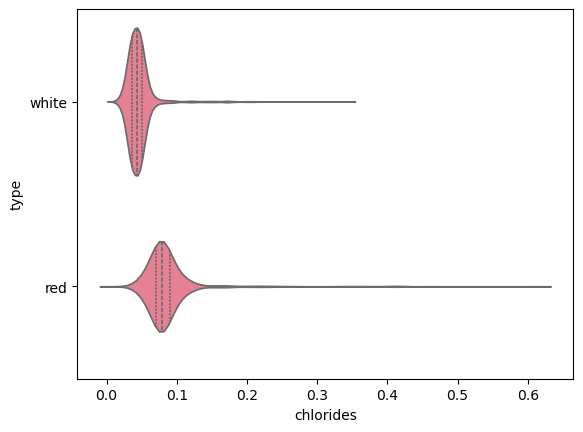

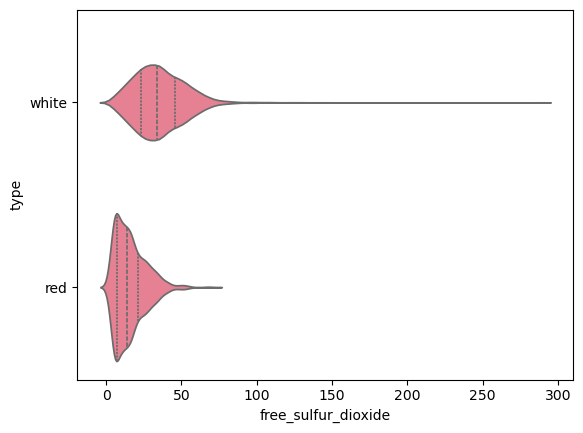

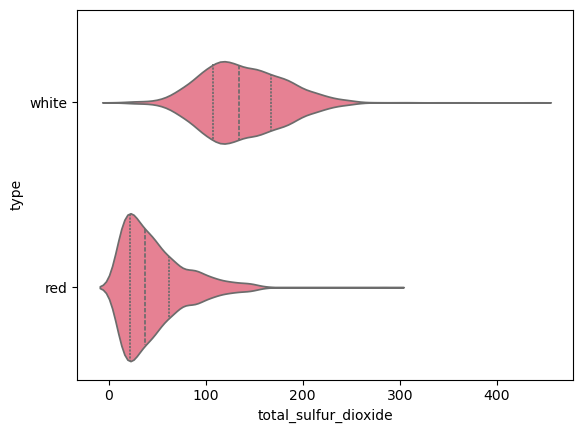

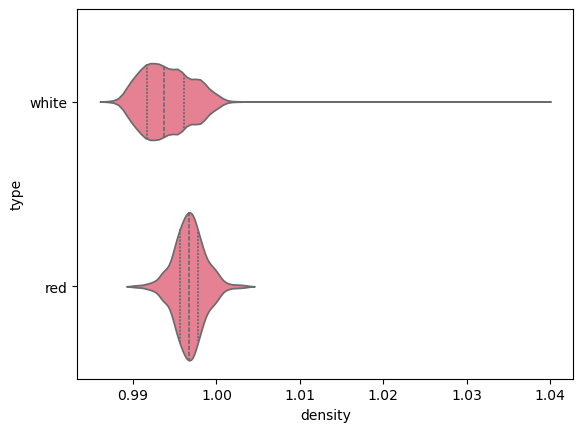

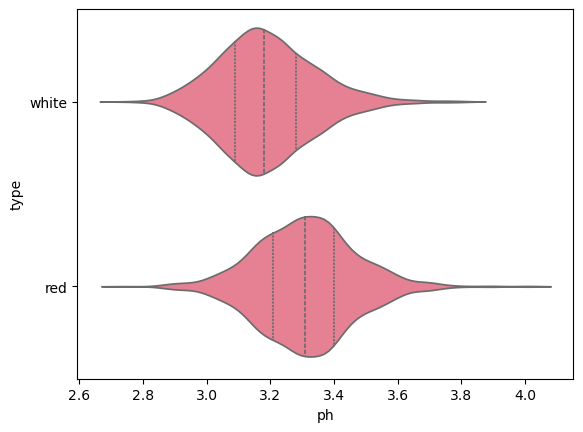

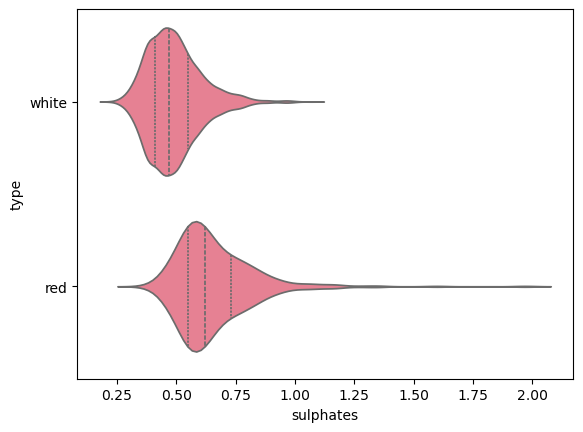

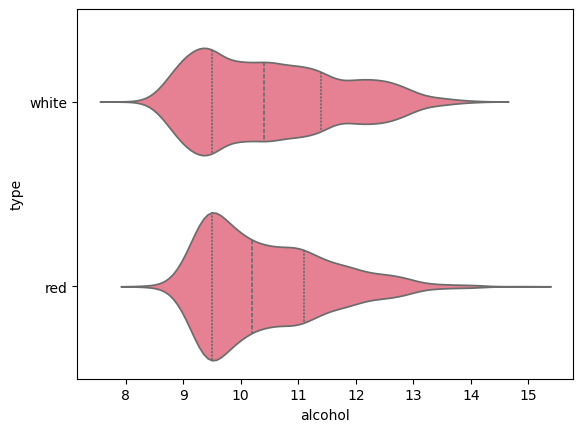

In [9]:
g = sns.violinplot(y='type', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='fixed_acidity', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='volatile_acidity', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='citric_acid', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='residual_sugar', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='chlorides', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='free_sulfur_dioxide', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='total_sulfur_dioxide', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='density', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='ph', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='sulphates', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='type', x='alcohol', data=wine_df, inner='quartile')
plt.show()

In [10]:
# Transform categorical variables into numerical variables
wine_df['type'] = wine_df['type'].map({'white': 0, 'red': 1})

In [11]:
# Fill missing data with random data
wine_df.fillna(wine_df.median(), inplace=True)

In [12]:
# Drop columns that do not have predictive power
wine_df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
#Write the features to the feature store as a Feature Group
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["type","fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","ph","sulphates","alcohol","quality"],
    description="Wine quality dataset")
wine_fg.insert(wine_df)

Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/206998/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x232e792ac40>, None)